<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra II: Matrix Operations

This topic, *Linear Algebra II: Matrix Operations*, builds on the basics of linear algebra. It is essential because these intermediate-level manipulations of tensors lie at the heart of most machine learning approaches and are especially predominant in deep learning. 

Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces as well as to reduce the dimensionality of complex spaces. The content covered in this topic is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*. 

Over the course of studying this topic, you'll: 

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning. 
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms. 
* Reduce the dimensionalty of complex spaces down to their most informative elements with techniques such as eigendecomposition, singular value decomposition, and principal component analysis.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Review of Introductory Linear Algebra*

* Modern Linear Algebra Applications
* Tensors, Vectors, and Norms
* Matrix Multiplication
* Matrix Inversion
* Identity, Diagonal and Orthogonal Matrices

*Segment 2: Eigendecomposition*

* Affine Transformation via Matrix Application
* Eigenvectors and Eigenvalues
* Matrix Determinants
* Matrix Decomposition 
* Applications of Eigendecomposition

*Segment 3: Matrix Operations for Machine Learning*

* Singular Value Decomposition (SVD)
* The Moore-Penrose Pseudoinverse
* The Trace Operator
* Principal Component Analysis (PCA): A Simple Machine Learning Algorithm
* Resources for Further Study of Linear Algebra

## Segment 1: Review of Introductory Linear Algebra

In [2]:
import numpy as np
import torch

### Vector Transposition

In [2]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [3]:
x.shape

(3,)

In [4]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [5]:
x.shape

(1, 3)

In [6]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [7]:
x.T.shape

(3, 1)

In [8]:
x_p = torch.tensor([25, 2, 5])
x_p

tensor([25,  2,  5])

In [9]:
x_p.T

c:\Users\BASAS\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3281.)
  """Entry point for launching an IPython kernel.


tensor([25,  2,  5])

In [10]:
x_p.view(3, 1) # "view" because we're changing output but not the way x is stored in memory

tensor([[25],
        [ 2],
        [ 5]])

**Return to slides here.**

## $L^2$ Norm

In [11]:
x

array([[25,  2,  5]])

In [12]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [13]:
np.linalg.norm(x)

25.573423705088842

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

In [14]:
# the following line of code will fail because torch.norm() requires input to be float not integer
# torch.norm(p)

In [15]:
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

**Return to slides here.**

### Matrices

In [16]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [17]:
X.shape

(3, 2)

In [18]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [19]:
X_p.shape

torch.Size([3, 2])

### Matrix Transposition

In [20]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [21]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [22]:
X_p.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

**Return to slides here.**

### Matrix Multiplication

Scalars are applied to each element of matrix:

In [23]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [24]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

In [25]:
X_p*3

tensor([[75,  6],
        [15, 78],
        [ 9, 21]])

In [26]:
X_p*3+3

tensor([[78,  9],
        [18, 81],
        [12, 24]])

Using the multiplication operator on two tensors of the same size in PyTorch (or Numpy or TensorFlow) applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**: 

In [27]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [28]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [29]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

In [30]:
A_p = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_p

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [31]:
X_p * A_p

tensor([[ 75,   8],
        [ 25, 156],
        [ 21,  56]])

Matrix multiplication with a vector: 

In [32]:
b = np.array([1, 2])
b

array([1, 2])

In [33]:
np.dot(A, b) # even though technically dot products is between 2 vectors

array([11, 17, 23])

In [34]:
b_p = torch.tensor([1, 2])
b_p

tensor([1, 2])

In [35]:
torch.matmul(A_p, b_p)

tensor([11, 17, 23])

Matrix multiplication with two matrices:

In [36]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [37]:
np.dot(A, B) # note first column is same as Xb

array([[11, 27],
       [17, 45],
       [23, 63]])

In [38]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [39]:
torch.matmul(A_p, B_p) 

tensor([[11, 27],
        [17, 45],
        [23, 63]])

### Matrix Inversion

In [40]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [41]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [42]:
y = np.array([4, -7])
y

array([ 4, -7])

In [43]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [44]:
np.dot(X, w)

array([ 4., -7.])

In [45]:
X_p = torch.tensor([[4, 2], [-5, -3.]]) # note that torch.inverse() requires floats
X_p

tensor([[ 4.,  2.],
        [-5., -3.]])

In [46]:
Xinv_p = torch.inverse(X_p)
Xinv_p

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [47]:
y_p = torch.tensor([4, -7.])
y_p

tensor([ 4., -7.])

In [48]:
w_p = torch.matmul(Xinv_p, y_p)
w_p

tensor([-1.,  4.])

In [49]:
torch.matmul(X_p, w_p)

tensor([ 4., -7.])

**Return to slides here.**

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [50]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [51]:
import matplotlib.pyplot as plt

In [52]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

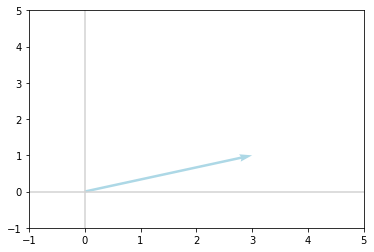

In [53]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [54]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [55]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [56]:
v == Iv

array([ True,  True])

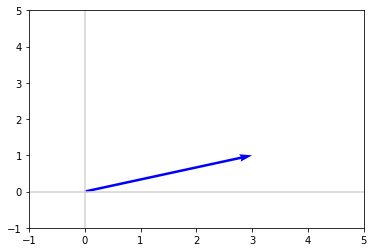

In [57]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [58]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [59]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

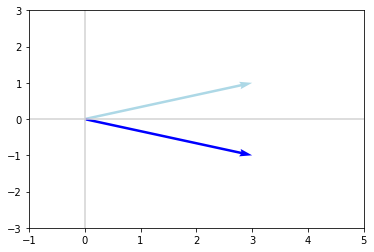

In [60]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [61]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [62]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

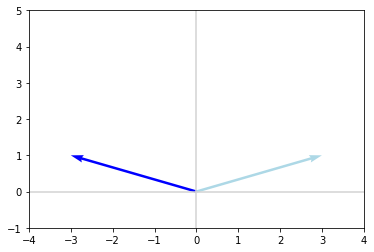

In [63]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 

In [64]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [65]:
Av = np.dot(A, v)
Av

array([1, 4])

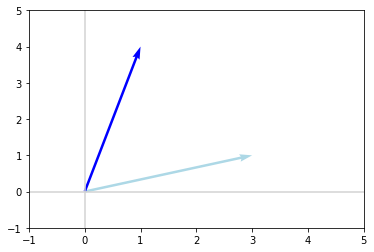

In [66]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

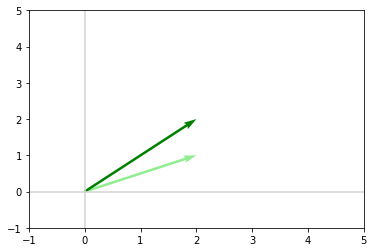

In [67]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [68]:
v

array([3, 1])

In [69]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [70]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [71]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [72]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [73]:
A

array([[-1,  4],
       [ 2, -2]])

In [74]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [75]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [76]:
vectorfy(V, 0)

array([3, 1])

In [77]:
vectorfy(V, 0) == v

array([ True,  True])

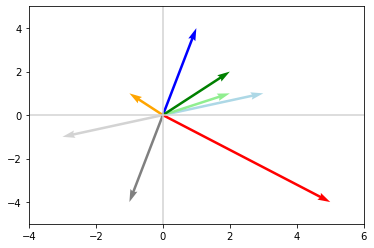

In [78]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues...

**Return to slides here.**

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

Easiest way to understand this is to work through an example: 

In [79]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [80]:
lambdas, V = np.linalg.eig(A) 

The matrix contains as many eigenvectors as there are columns of A: 

In [81]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [82]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [83]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [84]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [85]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [86]:
lambduh * v

array([1.18031462, 0.70000958])

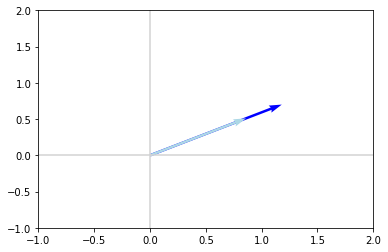

In [87]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

And again for the second eigenvector of A: 

In [88]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [89]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [90]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [91]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

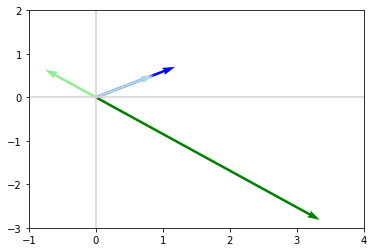

In [92]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same: 

In [93]:
A

array([[-1,  4],
       [ 2, -2]])

In [7]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [95]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [96]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [97]:
V_p = V_cplx.float()
V_p

c:\Users\BASAS\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Copy.cpp:250.)
  """Entry point for launching an IPython kernel.


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [98]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [99]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [100]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [101]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [102]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [103]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [104]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [105]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [106]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [107]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

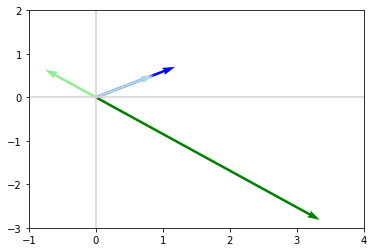

In [108]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows): 

In [109]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [110]:
lambdas_X, V_X = np.linalg.eig(X) 

In [111]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [112]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

Confirm $Xv = \lambda v$ for an example eigenvector: 

In [113]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [114]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948902

In [115]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [116]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

In [117]:
Py_X = torch.tensor([[25, 2, 9], [5, 26, -5], [3, 7, -1.]])
Py_X

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [118]:
Lambda_Py_X , v_py_X = torch.linalg.eig(Py_X)

In [119]:
Lambda_Py_X = Lambda_Py_X.float()

Lambda_Py_X

tensor([29.6762, 20.6212, -0.2974])

In [120]:
v_py_X = v_py_X.float()

v_py_X

tensor([[ 0.7118,  0.6502, -0.3422],
        [ 0.6665, -0.7446,  0.2379],
        [ 0.2217, -0.1509,  0.9090]])

In [121]:
print(Lambda_Py_X[0]*v_py_X[:,0])
print(Lambda_Py_X[1]*v_py_X[:,1])
print(Lambda_Py_X[2]*v_py_X[:,2])

tensor([21.1223, 19.7798,  6.5792])
tensor([ 13.4077, -15.3554,  -3.1110])
tensor([ 0.1018, -0.0708, -0.2703])


In [122]:
print(torch.matmul(Py_X,v_py_X[:,0]))
print(torch.matmul(Py_X,v_py_X[:,1]))
print(torch.matmul(Py_X,v_py_X[:,2]))

tensor([21.1223, 19.7798,  6.5792])
tensor([ 13.4077, -15.3554,  -3.1110])
tensor([ 0.1018, -0.0708, -0.2703])


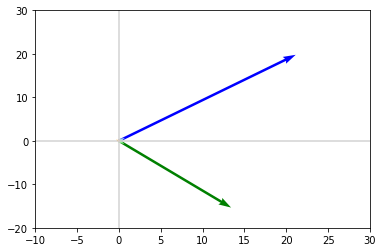

In [123]:
plot_vectors([torch.matmul(Py_X,v_py_X[:,0]).numpy(), v_py_X[:,0].numpy(),
              torch.matmul(Py_X,v_py_X[:,1]).numpy(), v_py_X[:,1].numpy(),
              torch.matmul(Py_X,v_py_X[:,2]).numpy(), v_py_X[:,2].numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen', 'red','orange'])
plt.xlim(-10, 30)
_ = plt.ylim(-20, 30)

# Eigen Values in Tensor Flow

In [124]:
import tensorflow as tf

tf_X = tf.Variable([[25, 2, 9], [5, 26, -5], [3, 7, -1.]])

tf_X

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[25.,  2.,  9.],
       [ 5., 26., -5.],
       [ 3.,  7., -1.]], dtype=float32)>

In [125]:
tf_eig, e = tf.linalg.eigh(tf_X) # Hermitian or real symmetric matrices

tf_eig

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.8185813, 20.701654 , 32.11694  ], dtype=float32)>

In [126]:
e

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.06441025, -0.78151137,  0.62055737],
       [ 0.22497904,  0.61721134,  0.753946  ],
       [-0.97223234,  0.09105057,  0.21557844]], dtype=float32)>

In [127]:
tf_eig, e = tf.linalg.eig(tf_X) # general square matrix and comes with a complex variable

tf_eig = tf.math.real(tf_eig)   # Extract real parts of eigenvalues
tf_eig

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([29.676205 , 20.621183 , -0.2974057], dtype=float32)>

In [128]:
e = tf.math.real(e)
e

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.71175754,  0.6501918 , -0.3422047 ],
       [ 0.66652113, -0.74464077,  0.23789723],
       [ 0.22169992, -0.15086648,  0.9090109 ]], dtype=float32)>

In [129]:
tf.convert_to_tensor(e[:,0], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.71175754, 0.66652113, 0.22169992], dtype=float32)>

In [130]:
tf_X

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[25.,  2.,  9.],
       [ 5., 26., -5.],
       [ 3.,  7., -1.]], dtype=float32)>

In [131]:
tf.transpose(np.matrix(e[:,0].numpy()))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.71175754],
       [0.66652113],
       [0.22169992]], dtype=float32)>

In [132]:
print(tf.matmul(tf_X,tf.transpose(np.matrix(e[:,0].numpy()))).numpy().T)
print(tf.matmul(tf_X,tf.transpose(np.matrix(e[:,1].numpy()))).numpy().T)
print(tf.matmul(tf_X,tf.transpose(np.matrix(e[:,2].numpy()))).numpy().T)

[[21.12228  19.779839  6.579221]]
[[ 13.407715  -15.355369   -3.1110435]]
[[ 0.10177517 -0.07074976 -0.27034438]]


In [133]:
np.matrix(tf_eig[0]*tf.transpose(np.matrix(e[:,0].numpy())))

matrix([[21.122263],
        [19.779818],
        [ 6.579212]], dtype=float32)

In [134]:
tf_eig[1]*tf.transpose(np.matrix(e[:,1].numpy()))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 13.407724 ],
       [-15.355373 ],
       [ -3.1110454]], dtype=float32)>

In [135]:
tf_eig[2]*tf.transpose(np.matrix(e[:,2].numpy()))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.10177362],
       [-0.07075199],
       [-0.270345  ]], dtype=float32)>

**Return to slides here.**

### 2x2 Matrix Determinants

In [136]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [137]:
np.linalg.det(X)

-2.0000000000000013

**Return to slides here.**

In [138]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [139]:
np.linalg.det(N)

0.0

In [140]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [141]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [142]:
torch.det(N) 

tensor(-0.)

**Return to slides here.**

### Generalizing Determinants

In [143]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [144]:
np.linalg.det(X)

19.999999999999996

**Return to slides here.**

### Determinants & Eigenvalues

In [145]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [146]:
np.product(lambdas)

19.99999999999999

**Return to slides here.**

Here's $|\text{det}(X)|$ in NumPy: 

In [147]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values: 

In [148]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

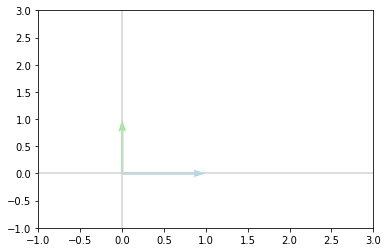

In [149]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Let's start by applying the matrix $N$ to $B$, recalling from earlier that $N$ is singular: 

In [150]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [151]:
np.linalg.det(N)

0.0

In [152]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

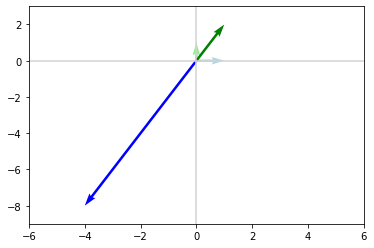

In [153]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [154]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

Aha! If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero. 

Now let's try applying $I_2$ to $B$: 

In [155]:
I

array([[1, 0],
       [0, 1]])

In [156]:
np.linalg.det(I)

1.0

In [157]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

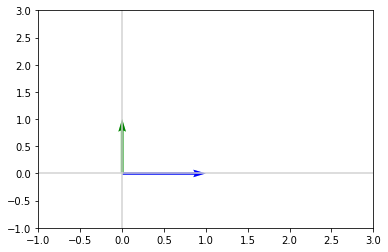

In [158]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [159]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix $J$ which is more interesting: 

In [160]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [161]:
np.linalg.det(J)

-1.0

In [162]:
np.abs(np.linalg.det(J))

1.0

In [163]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

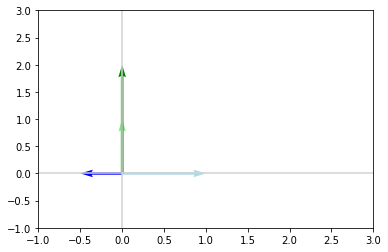

In [164]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [165]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix $D$, which scales vectors by doubling along both the $x$ and $y$ axes: 

In [166]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [167]:
np.linalg.det(D)

4.0

In [168]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

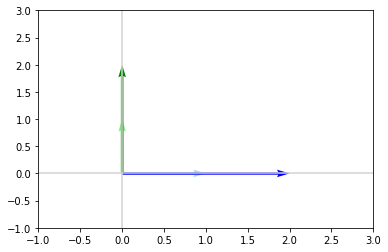

In [169]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [170]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

**Return to slides here.**

### Eigendecomposition

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [171]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [172]:
lambdas, V = np.linalg.eig(A)

In [173]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [174]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [175]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $A = V \Lambda V^{-1}$: 

In [176]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [177]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [178]:
lambdas, Q = np.linalg.eig(A)

In [179]:
lambdas

array([3., 1.])

In [180]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [181]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$: 

In [182]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [183]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [184]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [185]:
np.linalg.norm(Q[0])

0.9999999999999999

In [186]:
np.linalg.norm(Q[1])

0.9999999999999999

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [187]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [188]:
P_lamb , P_V = torch.linalg.eig(P)

In [189]:
P_lamb = P_lamb.float()
P_V = P_V.float()

In [190]:
P_INV = torch.linalg.inv(P_V)

P_INV

tensor([[ 1.1356,  0.0102, -0.2868],
        [ 0.3914, -0.7198, -1.0032],
        [ 0.0817, -1.1164,  0.2052]])

In [191]:
P_lamb = torch.diag(P_lamb)

P_lamb

tensor([[23.7644,  0.0000,  0.0000],
        [ 0.0000,  6.6684,  0.0000],
        [ 0.0000,  0.0000, -3.4328]])

In [192]:
P_eigdec = torch.matmul(P, torch.matmul(P_lamb,P_INV))

In [193]:
P == P_eigdec

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [194]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [195]:
S_lamb , S_V = torch.linalg.eig(S)

In [196]:
S_lamb = S_lamb.float()
S_lamb

tensor([26.2361,  3.2435, -2.4796])

In [197]:
S_V = S_V.float()
S_V

tensor([[ 0.9744,  0.1943, -0.1132],
        [ 0.0614,  0.2548,  0.9651],
        [-0.2163,  0.9473, -0.2363]])

In [198]:
S_lamb = torch.diag(S_lamb)
S_lamb

tensor([[26.2361,  0.0000,  0.0000],
        [ 0.0000,  3.2435,  0.0000],
        [ 0.0000,  0.0000, -2.4796]])

In [199]:
S_eigdec = torch.matmul(S_V, torch.matmul(S_lamb, S_V.T))
S_eigdec

tensor([[25.0000,  2.0000, -5.0000],
        [ 2.0000, -2.0000,  1.0000],
        [-5.0000,  1.0000,  4.0000]])

In [200]:
S == S_eigdec

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

**Return to slides here.**

## Segment 3: Matrix Operations for ML

### Singular Value Decomposition (SVD)

As on slides, SVD of matrix $A$ is: 

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [201]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [202]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [203]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [204]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [205]:
d

array([8.66918448, 4.10429538])

In [206]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible: 

In [207]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [208]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true. 

In [209]:
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [210]:
P_LSV, P_D, P_RSV = torch.linalg.svd(P)

In [211]:
P_LSV

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [212]:
P_D

tensor([26.1632,  8.1875,  2.5395])

In [213]:
P_RSV

tensor([[-0.9810, -0.1196,  0.1528],
        [ 0.0113, -0.8211, -0.5706],
        [-0.1937,  0.5581, -0.8069]])

In [214]:
P_PT = torch.matmul(P,P.T)

In [215]:
P_PT_lamb , P_PT_V = torch.linalg.eig(P_PT)

In [216]:
P_PT_V = P_PT_V.float()

In [217]:
# TO Prove first Eqn, LSV of matrix = Eig vections of Matrix * Matrix.T

P_LSV

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [218]:
P_PT_V

tensor([[-0.9757, -0.1823,  0.1214],
        [-0.0975, -0.1350, -0.9860],
        [-0.1961,  0.9739, -0.1140]])

(-2, 1)

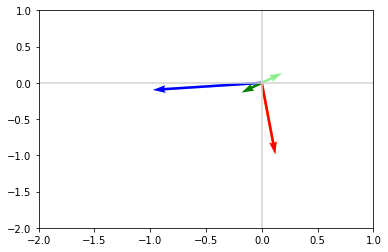

In [219]:
plot_vectors([vectorfy(P_LSV, 0), vectorfy(P_LSV, 1), vectorfy(P_LSV, 2),vectorfy(P_PT_V, 0), vectorfy(P_PT_V, 1), vectorfy(P_PT_V, 2)],
            ['lightblue', 'lightgreen','Orange', 'blue', 'green','red'])

plt.xlim([-2,1])
plt.ylim([-2,1])

In [220]:
PT_P = torch.matmul(P.T,P)

In [221]:
PT_P_Lamb, PT_P_V = torch.linalg.eig(PT_P)

In [222]:
P_RSV.T

tensor([[-0.9810,  0.0113, -0.1937],
        [-0.1196, -0.8211,  0.5581],
        [ 0.1528, -0.5706, -0.8069]])

In [223]:
PT_P_V.float()

tensor([[ 0.9810,  0.1937, -0.0113],
        [ 0.1196, -0.5581,  0.8211],
        [-0.1528,  0.8069,  0.5706]])

In [224]:
PT_P_Lamb.float()

tensor([684.5149,   6.4492,  67.0359])

In [225]:
P_PT_lamb.float()

tensor([684.5149,  67.0359,   6.4492])

In [226]:
P_D**2

tensor([684.5148,  67.0359,   6.4492])

In [227]:
PT_P_Lamb

tensor([684.5149+0.j,   6.4492+0.j,  67.0359+0.j])

### Image Compression via SVD

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [228]:
from PIL import Image

Fetch photo of Oboe, a terrier, with the book *Deep Learning Illustrated*: 

In [229]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


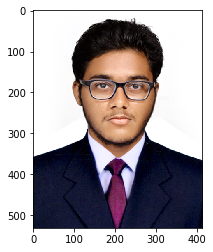

In [244]:
img = Image.open(r'C:\Users\BASAS\Downloads\Python For DS\ML\PHOTO.JPG')
_ = plt.imshow(img)

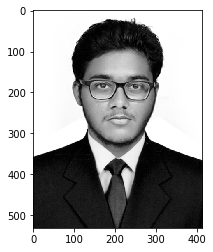

In [245]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

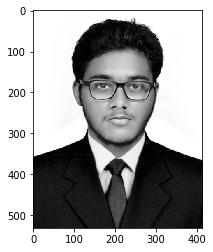

In [246]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [247]:
U, sigma, V = np.linalg.svd(imgmat)

In [234]:
sigma[:1]

array([75701.07403618])

In [235]:
U.shape

(531, 531)

In [236]:
U = np.matrix(U)

In [237]:
U.ndim

2

In [238]:
sigma = np.diag(sigma)

In [239]:
sigma[:1]

array([[75701.07403618,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.  

In [240]:
V.shape

(413, 413)

In [241]:
np.diag(sigma[1])

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 18218.91803681,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

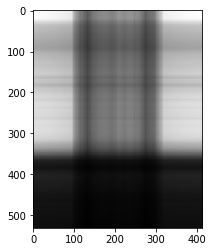

In [248]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

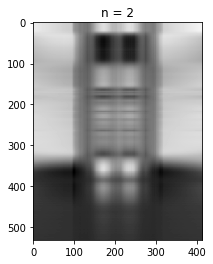

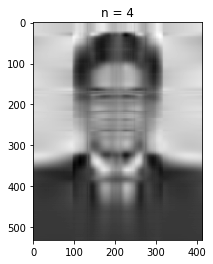

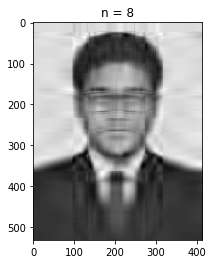

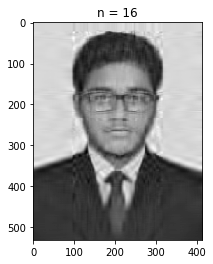

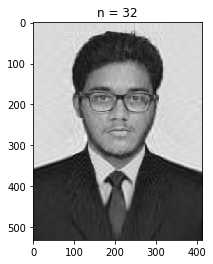

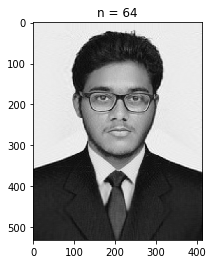

In [249]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [250]:
imgmat.shape

(531, 413)

In [251]:
full_representation = 531*413
full_representation

219303

In [252]:
svd64_rep = 64*531 + 64 + 64*413
svd64_rep

60480

In [253]:
svd64_rep/full_representation

0.2757828210284401

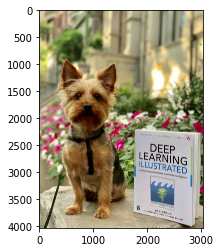

In [ ]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels: 

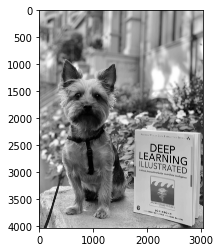

In [ ]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data: 

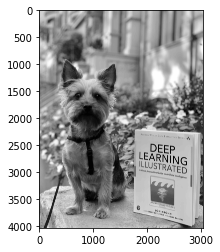

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image: 

In [ ]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

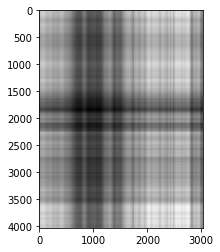

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality: 

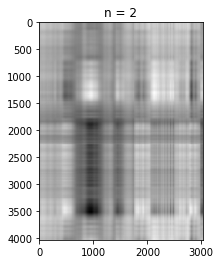

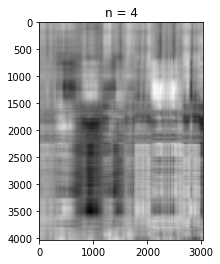

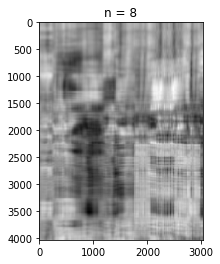

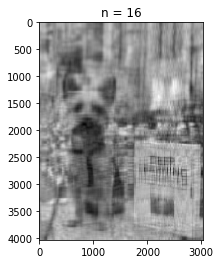

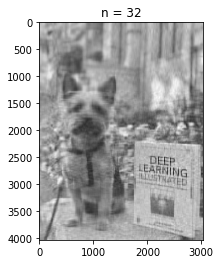

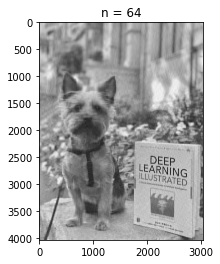

In [ ]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [ ]:
imgmat.shape

(4032, 3024)

In [ ]:
full_representation = 4032*3024
full_representation

12192768

In [ ]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [ ]:
svd64_rep/full_representation

0.037042286050222556

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original! 

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

**Return to slides here.**

### The Moore-Penrose Pseudoinverse

Let's calculate the pseudoinverse $A^+$ of some matrix $A$ using the formula from the slides: 

$A^+ = VD^+U^T$

In [254]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

As shown earlier, the NumPy SVD method returns $U$, $d$, and $V^T$:

In [255]:
U, d, VT = np.linalg.svd(A)

In [256]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [257]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [258]:
d

array([8.66918448, 4.10429538])

To create $D^+$, we first invert the non-zero values of $d$: 

In [259]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [260]:
1/8.669

0.11535355865728457

In [261]:
1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because $D$ is a diagonal matrix, this can, however, be done in a single step by inverting $D$: 

In [262]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible: 

In [263]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

(Recall $D$ must have the same dimensions as $A$ for SVD's $UDV^T$, but for MPP $U$ and $V$ have swapped sides around the diagonal matrix.)

Now we have everything we need to calculate $A^+$ with $VD^+U^T$: 

In [264]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method `pinv()`: 

In [265]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

**Exercise** 

Use the `torch.svd()` method to calculate the pseudoinverse of `A_p`, confirming that your result matches the output of `torch.pinverse(A_p)`: 

In [9]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [281]:
UL_P, DL_P, VTL_P = torch.linalg.svd(A_p)

In [282]:
UL_P

tensor([[ 0.1271,  0.4741,  0.8713],
        [ 0.0016, -0.8785,  0.4778],
        [ 0.9919, -0.0593, -0.1124]])

In [283]:
DL_P

tensor([8.6692, 4.1043])

In [284]:
VTL_P

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])

In [285]:
DL_P_plus = torch.diag(DL_P)
DL_P_plus

tensor([[8.6692, 0.0000],
        [0.0000, 4.1043]])

In [286]:
DL_P_plus = torch.inverse(DL_P_plus)

In [287]:
DL_P_plus

tensor([[0.1154, 0.0000],
        [0.0000, 0.2436]])

In [291]:
DL_P_plus = torch.concatenate((DL_P_plus,torch.tensor([[0,0.]]).T),axis = 1)
DL_P_plus

tensor([[0.1154, 0.0000, 0.0000],
        [0.0000, 0.2436, 0.0000]])

In [292]:
AL_P_Plus = torch.matmul(VTL_P.T,torch.matmul(DL_P_plus,UL_P.T))
AL_P_Plus

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [293]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [304]:
U_P, D_P, VT_P = torch.svd(A_p)

In [305]:
U_P

tensor([[ 0.1271,  0.4741],
        [ 0.0016, -0.8785],
        [ 0.9919, -0.0593]])

In [306]:
D_P

tensor([8.6692, 4.1043])

In [307]:
VT_P

tensor([[ 0.5580, -0.8298],
        [ 0.8298,  0.5580]])

In [308]:
D_P_plus = torch.diag(D_P)
D_P_plus

tensor([[8.6692, 0.0000],
        [0.0000, 4.1043]])

In [309]:
D_P_plus = torch.inverse(D_P_plus)
D_P_plus

tensor([[0.1154, 0.0000],
        [0.0000, 0.2436]])

In [310]:
# D_P_plus = torch.concatenate((D_P_plus,torch.tensor([[0,0.]]).T),axis = 1)
# D_P_plus

In [311]:
A_P_Plus = torch.matmul(VT_P.T,torch.matmul(D_P_plus,U_P.T))
A_P_Plus

tensor([[ 0.1040, -0.1775,  0.0519],
        [ 0.0523, -0.1196, -0.1030]])

In [312]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

**Return to slides here.**

For regression problems, we typically have many more cases ($n$, or rows of $X$) than features to predict (columns of $X$). Let's solve a miniature example of such an overdetermined situation. 

We have eight data points ($n$ = 8): 

In [314]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [315]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

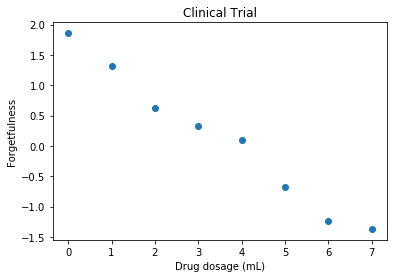

In [316]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

In [317]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate $x_0$ and $x_1$ into a matrix $X$: 

In [318]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$: 

In [329]:
np.linalg.pinv(X)

matrix([[ 4.16666667e-01,  3.33333333e-01,  2.50000000e-01,
          1.66666667e-01,  8.33333333e-02,  5.33021083e-17,
         -8.33333333e-02, -1.66666667e-01],
        [-8.33333333e-02, -5.95238095e-02, -3.57142857e-02,
         -1.19047619e-02,  1.19047619e-02,  3.57142857e-02,
          5.95238095e-02,  8.33333333e-02]])

In [327]:
y

[1.86, 1.31, 0.62, 0.33, 0.09, -0.67, -1.23, -1.37]

In [330]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

In [331]:
X = np.concatenate((np.matrix(x1).T, np.matrix(x0).T), axis=1)
X

matrix([[0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.],
        [5., 1.],
        [6., 1.],
        [7., 1.]])

In [332]:
w_changed = np.dot(np.linalg.pinv(X),y)
w_changed

matrix([[-0.46928571,  1.76      ]])

In [319]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the $y$-intercept of the line, which is typically denoted as $b$: 

In [320]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as $m$: 

In [321]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

With the weights we can plot the line to confirm it fits the points: 

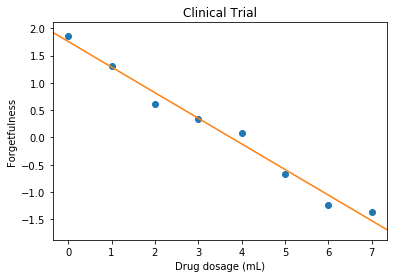

In [322]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

**DO NOT return to slides here. Onward!**

### The Trace Operator

Denoted as Tr($A$). Simply the sum of the diagonal elements of a matrix: $$\sum_i A_{i,i}$$

In [4]:
A = np.array([[25, 2], [5, 4]])
A

array([[25,  2],
       [ 5,  4]])

In [5]:
25 + 4

29

In [6]:
np.trace(A)

29

The trace operator has a number of useful properties that come in handy while rearranging linear algebra equations, e.g.:

* Tr($A$) = Tr($A^T$)
* Assuming the matrix shapes line up: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)

In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

**Exercises**

With the matrix `A_p` provided below: 

1. Use the PyTorch trace method to calculate the trace of `A_p`.
2. Use the PyTorch Frobenius norm method and the trace method to demonstrate that $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$

In [16]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [18]:
AT_p = A_p.T
AT_p

tensor([[-1.,  3.,  5.],
        [ 2., -2.,  7.]])

In [20]:
A_AT_p = torch.matmul(A_p, AT_p)
A_AT_p

tensor([[ 5., -7.,  9.],
        [-7., 13.,  1.],
        [ 9.,  1., 74.]])

In [27]:
F_Norm = torch.sqrt(torch.trace(A_AT_p))
F_Norm

tensor(9.5917)

In [12]:
torch.trace(A_p)

tensor(-3.)

In [30]:
torch.norm(A_p)

tensor(9.5917)

**Return to slides here.**

### Principal Component Analysis

This PCA example code is adapted from [here](https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/PCA.ipynb).

In [31]:
from sklearn import datasets
iris = datasets.load_iris()

c:\Users\BASAS\anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
c:\Users\BASAS\anaconda\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note

In [33]:
iris.data.shape

(150, 4)

In [34]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [36]:
from sklearn.decomposition import PCA

c:\Users\BASAS\anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\BASAS\anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [38]:
pca = PCA(n_components=2)

In [39]:
X = pca.fit_transform(iris.data)

In [40]:
X.shape

(150, 2)

In [41]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

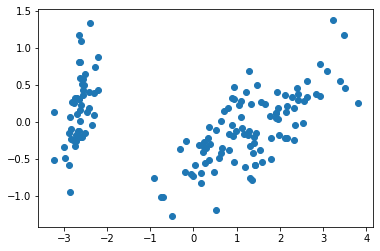

In [45]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [63]:
iris.target.shape

(150,)

In [64]:
X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [66]:
Unique_X, Unique_X_Counts = np.unique(np.round(X), return_counts=True)
Unique_X

array([-3., -2., -1., -0.,  1.,  2.,  3.,  4.])

In [67]:
Unique_X_Counts

array([ 40,  10,  28, 125,  58,  26,  12,   1], dtype=int64)

In [58]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [59]:
Color = iris.target

In [60]:
Color

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]], dtype=int64)

In [49]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

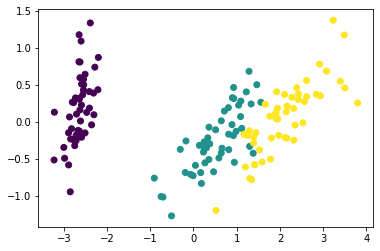

In [61]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

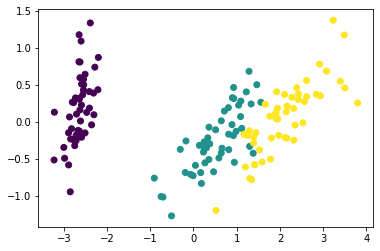

In [62]:
_ = plt.scatter(X[:, 0], X[:, 1], c=Color)

**Return to slides here.**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits 

In [2]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
data.data.shape

(1797, 64)

In [4]:
data.data[0].reshape(8,8)   # Reshaping this to visualize

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

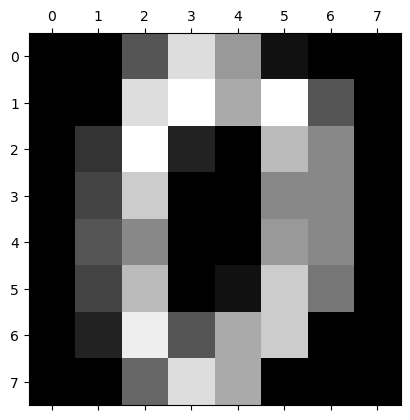

In [6]:
plt.gray()
plt.matshow(data.data[0].reshape(8,8))

In [7]:
import numpy as np

np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [12]:
X = df
Y = data.target

In [13]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
from sklearn.preprocessing import StandardScaler   # -1 to 1

scaler = StandardScaler()

X_Scaled = scaler.fit_transform(X)

X_Scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state=30)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9722222222222222

In [17]:
from sklearn.decomposition import PCA

pca = PCA(0.95) # Telling PCA to retain 95% of useful features and it will calculate new columns everything is principal component 

In [21]:
X_pca = pca.fit_transform(X)

X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [24]:
pca.n_components_

29

In [25]:
X_pca_train, X_pca_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)

In [27]:
model_pca = LogisticRegression(max_iter = 1000)
model_pca.fit(X_pca_train, Y_train)
model_pca.score(X_pca_test, Y_test)

0.9694444444444444

If I try to do with n_components, I might be losing lot of features which will eventually reduce my model accuqracy